## DERIVATIVE PRICING
MODULE 4 | LESSON 2


---



# **ITO'S LEMMA AND BLACK-SCHOLES MODEL**


|  |  |
|:---|:---|
|**Reading Time** |  65 minutes |
|**Prior Knowledge** | GBM, Black-Scholes  |
|**Keywords** | Ito's lemma, GBM, Black-Scholes, Greeks |


---<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

*In this lesson, we will work on developing the intuition and main code to implement the **Black-Scholes** option pricing model.*

*All the closed-form equations used here are developed intuitively in the slides/video for this lesson and with more mathematical detail in the additional readings and videos for the lesson. Make sure you check those before continuing on.*

As usual, let's begin by importing the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm
import pandas as pd

## **1. The Log-Normal Property of Stock Prices**

Let's start by exploring the historical distribution of stock prices. We will come back to this later on, but at this point, it will serve to illustrate the reason (or simplification made) for using log-normal distributions.

To do that, let's quickly download some historical price data from TSLA stock.

In [2]:
tsla = pd.read_csv('TSLA_wqu_data.csv', parse_dates=['timestamp'])

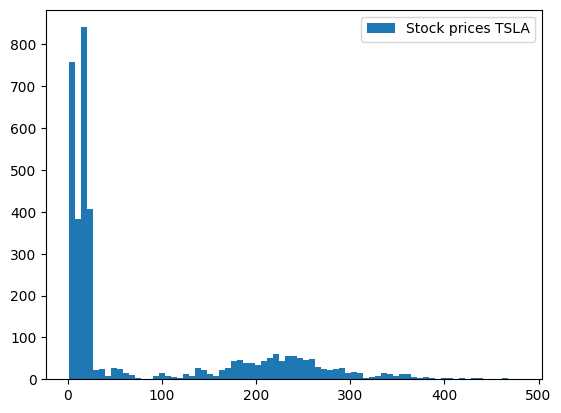

In [3]:
plt.hist(tsla['close'], bins=75, label="Stock prices TSLA")
plt.legend()
plt.show()

As you can see, this somewhat resembles a log-normal distribution.

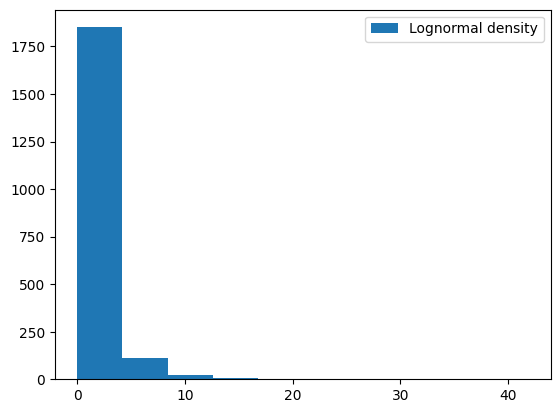

In [4]:
r = lognorm.rvs(1, size=2000)
plt.hist(r, label="Lognormal density")
plt.legend()
plt.show()

Now, there may be some arguments in favor and against this resemblance to log-normal distributions (e.g., what happens with large shocks?). However, for now, we are going to assume this log-normality of stock prices, which implicitly means that we can model changes in stock prices (returns) using logarithms (Ln). Conveniently for us, the log-transform of a log-normally distributed variable will follow a normal distribution.

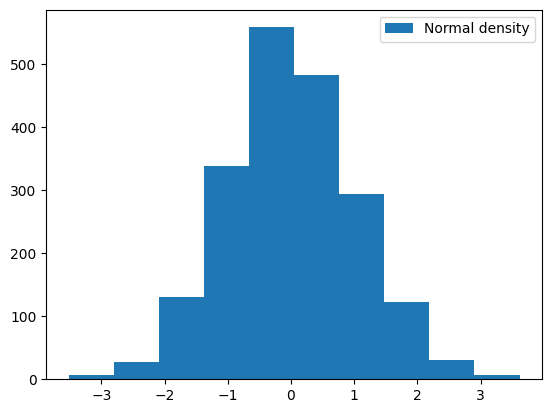

In [5]:
s = np.log(r)
plt.hist(s, label="Normal density")
plt.legend()
plt.show()

## **2. Pricing a Call Option with Black-Scholes**

Now that we have investigated the intuition behind the log-normal assumption for stock prices, let's proceed to a complete pricing example using the **Black-Scholes model** and the equations developed in the slides.

Let's start by building a function (`bs_call_price`) that returns the value of a call option under the Black-Scholes model. Remember:

$c = S_0 \mathcal{N}(d_1) - K e^{-rT}\mathcal{N}(d_2) $

In [5]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

Now, let's check how our function performs to price a call option with:

- $S_0 = 100$
- $r=0$
- $σ=20\%$
- $t=0$
- $T=2$
- $K=105$

In [6]:
print(bs_call_price(100.0, 0.0, 0.2, 0, 2.0, 105.0))

9.19735064929452


## **3. Greeks**

Next, let's implement the calculation of the **Greeks**, as seen from the closed-form formulas in the slides. At this point, let's just think of the Greeks as sensitivities of option prices to movements in different variables of interest. In the future, we will dig deeper into this part in order to use Greeks to **hedge away the different risks we may be facing in a portfolio**.

In [7]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 2.0  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 105.0
r = 0
vol = 0.20  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 9.197350649294513
Delta = 0.4876036978454982
Gamma = 0.014097929791127266
Vega = 56.39171916450907
Theta = -2.819585958225453
Rho = 79.1260382705106


## **4. Conclusion**

In this lesson, we have looked at the lognormal property of stock prices and covered the basics of option pricing under the Black-Scholes model, including the different Greeks.

Now that you know the basics of Black-Scholes pricing and the lognormal property of stock prices, proceed to the next lesson in order to work more on the Black-Scholes option pricing model and related features.

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
